# Week 6 - Your 2nd ML Model: The Support Vector Machine


<hr style="border:2px solid gray">

# Outline <a id='outline'></a>
1. [Section One: The Support Vector Machine](#section-1)
1. [Section Two: A toy model with SVR](#section-2)
1. [Section Three: SVM for non-linear problems](#section-3)
1. [Section Four: The California Housing dataset](#section-4)
1. [Section Five: Exercises](#section-5)


<hr style="border:2px solid gray">

<a name="section-1"></a>

# Section One: The Support Vector Machine [^](#outline)

The Support Vector Machine (SVM) is one of the most commonly used ML techniques. SVMs can be used in classification or regression, although generally more the former. You briefly encountered an SVM for classification last week, although only seeing the sklearn syntax. This week you will see SVMs in more detail, including discussion of how they work, some of the mathematics, and how they can be applied to regression. For the exercises this week, you will be using support vector regression to estimate the median house value in a number of California districts, the dataset for which is discussed in [Section Four](#section-4).

The following sections will provide an outline of the theoretical basis of SVM classification and regression, for linear problems. You will see non-linear problems tackled in [Section Three](#section-3).

## Linear SVM classification (SVC)

For linear SVM classification, we typically deal with **linearly-separable** datasets. This refers to datasets that can be separated with a single line or plane or hyperplane, depending on the number of dimensions of the input feature space. 

For a general linearly-separable binary classification problem, we may be able to intuitively find a hyperplane that separates our two classes, as seen in the 2D example below. 

Here we have taken two of the classes from the Iris dataset you saw last week, *iris versicolor* and *iris setosa*, and plotted the distribution of petal length against petal width. These two classes are linearly separable in these variables. The dotted and dashed lines illustrate possible separation lines.

These possible separators are not necessarily robust against outliers; it is easy to imagine additional irises in either class crossing these classification lines, due to the spread of possible values. We need to optimise our choice of separation line to ensure we are robust against outliers and variation in our data.

<div>
<img src=Week6_plots/arbitrary_separators_example.png align='center' width=600>
</div>

*Example possible separating lines for two of the classes in the Iris dataset. While these lines do separate the two classes, they are not robust against outliers.*


The support vector machine attempts to address this problem. In general, we want to define some hyperplane that optimally separates the two classes. This hyperplane is referred to as the **maximum-margin hyperplane**. 

To define the maximum-margin hyperplane for linearly separable data, we first define two parallel hyerplanes that separate the two classes. The region these hyperplanes bound is referred to as the **margin**, and the maximum-margin hyperplane is the hyperlane exactly in the middle of the margin. For normalised data, the margin-bounding hyperplanes can be described by the following equations:

* $\mathbf{w}^\intercal\mathbf{X} - b = +1$: any points on or above this boundary are in the class with label +1

* $\mathbf{w}^\intercal\mathbf{X} - b = -1$: any points on or below this boundary are in the class with label -1

Here, $\mathbf{X}$ denotes any vector in the $d$-dimensional input space $\mathbb{R}^d$. $\mathbf{w}$ and $b$ are vector and scalar parameters of the hyperplanes respectively, and $\mathbf{w}^\intercal$ denotes the transpose of the vector $\mathbf{w}$.

The distance between these two planes is equal to $\frac{2}{||\mathbf{w}||}$, so to maximise the size of the margin we must minimise $||\mathbf{w}||$. The function of SVM classifier training is therefore to optimise the class discrimination on the training set {$\mathbf{X}_i$, $y_i$}  by minimising $||\mathbf{w}||$. The specific problem to solve depends on the strictness of the margin, which is discussed below.



### Hard-margin classification

For linearly-separable data, we can impose the so-called **hard-margin** condition, which requires that **no** data points are allowed inside the margin. The optimisation of the choice of hyperplane is subject to the requirement that we have no **margin violations**. A margin violation is when we have a point or multiple points inside the margin.



<div style="background-color:#FFCCCB">


Before, we simply outlined rules as to how we label points relative based on their position relative to the planes bounding the margin. The hard-margin condition can be expressed as 

* $\mathbf{w}^\intercal\mathbf{X}_i - b \geq 1, \text{ for } y_i = 1$
* $\mathbf{w}^\intercal\mathbf{X}_i - b \leq -1, \text{ for } y_i = -1$

This requires that all training points are outside of the margin. The two conditions can be combined into a single condition, as

\begin{equation*}
y_i \cdot (\mathbf{w}^\intercal\mathbf{X}_i - b) \geq 1, \quad \forall\,\,i
\end{equation*}

The optimisation problem that is solved during SVM classifier training is therefore completely defined as:

\begin{align*}
\min_{\mathbf{w},\, b}\quad & \frac{1}{2}||\mathbf{w}||^2 \\
\text{subject to}\quad & y_i\cdot(\mathbf{w}^\intercal\mathbf{X}_i - b) \geq 1  ,
\end{align*}
where $\min\limits_{\mathbf{w{,\, b}}}$ means that the minimisation is with respect to $\mathbf{w}$ and $b$. While we previously said that we needed to minimise $||\mathbf{w}||$, minimising $||\mathbf{w}||^2$ is more numerically stable (the explanation of this is beyond the scope of this course) and as such is chosen for optimisation. The factor of 1/2 is added to make partial derivatives during the optimisation less messy. The values of $\mathbf{w}$ and $b$ that solve this optimisation define the classifier.  

The prediction for a test point $\mathbf{X}_t$ is then given as $\hat{y}_t$ = $\text{sign}(\mathbf{w}^\intercal\mathbf{X}_t - b)$. If the value of $\mathbf{w}^\intercal\mathbf{X}_t - b$ is positive, then $\hat{y}_t$ is assigned to be +1, and if $\mathbf{w}^\intercal\mathbf{X}_t - b$ is negative then $\hat{y}_t$ is assigned to be -1.



The result of applying this analysis to the same Iris data shown above can be seen in the figure below. 

The dashed lines indicate the boundaries of the margin and the solid line indicates the maximum-margin line (as this is a 2D problem we can refer to it as a line rather than a hyperplane). 

The maximum-margin line is only dependent on the points in each class closest to the line, which are referred to as the **support vectors** and are the namesake of the support vector machine.

<div>
<img src=Week6_plots/svc_hard_iris.png align='center' width=600>
</div>
    
*Hard margin classification using the Iris dataset. The dashed lines indicate the margin boundaries and the points indicated in red are the **support vectors**.*

### Soft-margin classification

Of course, it may not always be possible to construct a maximum-margin hyperplane such that all of the data points are outside of the margin. This means that the data is not linearly separable, and results in so-called **margin violations** where training data points are inside the margin. You may also find that even if your data is linearly separable, it may be with a very small margin, which is not very resistant to outliers. To tackle such cases, the soft-margin condition is introduced. 

Rather than strictly requiring all points are on the boundary or outside of the margin, we can allow points inside the margin. 

To do this, we add a penalty term to the optimsation that penalises points for lying too far into the margin. The strength of this penalty is controlled by a parameter $C$, which is known as a **regularisation parameter**. This is a hyperparameter of the algorithm, and you will have seen it in sklearn last week. 

Low values of $C$ allow greater margin violations, while high values minimise margin values. Very high values of $C$ tend towards the hard-margin classification problem, i.e. no margin violations allowed.




<div style="background-color:#FFCCCB">

For each point a small margin of error $\zeta_i$ can be defined. This allows points to lie in the margin, with a penalty assigned for how far into the margin a given point lies. The corresponding optimisation problem can be written as

\begin{align*}
\min_{\mathbf{w},\, b,\, \zeta} \quad & \frac{1}{2} ||\mathbf{w}||^2 + C\sum_{i = 1}^n\zeta_i \\
\text{subject to} \quad& \begin{cases} & y_i\cdot(\mathbf{w}^\intercal\mathbf{X}_i - b)\geq 1 - \zeta_i, \\
 & \zeta_i \geq 0 \quad \forall\,\, i,\end{cases}
\end{align*}
where $C$ is a **hyperparameter** of the algorithm and determines how heavily margin violations are penalised. $C$ is known as the **regularisation parameter**. Low values of $C$ allow greater margin violations, while high values minimise margin violations. For very high values of $C$, this is very similar to the hard-margin classification problem. $C$ is a hyperparameter of the algorithm and you will have seen it in `scikit-learn` last week.



This additional constraint is equivalent to using a loss function known as the **hinge loss function**. This function is defined as

\begin{equation*}
f(\hat{y}_i, y_i) = \max (0, 1 - \hat{y}_i \cdot y_i),
\end{equation*}

where: 
* $\hat{y}_i$ denotes the prediction for sample $i$ and is equal to $\mathbf{w}^\intercal\cdot\mathbf{X}_i - b$
* $y_i$ denotes the target for sample $i$ 
* $f(\hat{y}_i, y_i)$ denotes the value of the hinge loss. 
    
This penalises predictions where $\hat{y}_i$ and $y_i$ have different signs (as $\hat{y}_i, y_i \in \{-1, +1\}$)






We have now formulated the so-called **primal** optimisation problem. In general, this is a hard-to-optimise problem; to make things easier, we can use a method of Lagrange multipliers to formulate the **dual** problem. For $n$ input samples with $p$ features each such that $\mathbf{X}_i \in \mathbb{R}^p$ and $i = 1, \dots, n$, and targets $y_i$ (which can be composed in a vector $\mathbf{y} = (y_1, \dots, y_n)$):


\begin{align*}
    \min_\alpha \quad & \frac{1}{2}\boldsymbol\alpha^\intercal \mathbf{Q} \boldsymbol\alpha - \mathbf{e}^\intercal \boldsymbol\alpha \\
    \text{subject to} \quad & \begin{cases}
        & \mathbf{y}^\intercal\alpha = 0 \\
        & 0 \leq \alpha_i \leq C \quad \forall\,\, i
    \end{cases}
\end{align*}

Symbols are defined as follows:

* $\boldsymbol\alpha$ is the vector of Lagrange multipliers ($\alpha_1, \dots, \alpha_n$), where $\alpha_i$ is the Lagrange multiplier for training sample $i$
* $\mathbf{Q}$ is a $n$ by $n$ positive semi-definite matrix, with entries $Q_{ij} = y_i y_j \mathbf{X}^\intercal_i\mathbf{X}_j$
* $\mathbf{e}$ is the vector of all ones (1, $\dots$, 1)

Here we have followed the notation convention of the sklearn [User Guide](https://scikit-learn.org/stable/modules/svm.html) for support vector machines.

Important note: this optimisation problem only depends on the input vectors $\mathbf{X}_i$ and $\mathbf{X}_j$ through an inner product between them. This will be important later when we discuss SVM for non-linear problems.

When you work through this optimisation problem, it can be shown that the prediction of a soft-margin classifier for a test point $\mathbf{X}_t$ is given by

\begin{equation*}
\hat{y}_t = \text{sign}\left(\sum_{i\,\in\,\text{SV}}y_i\alpha_i\mathbf{X_i}^T\cdot\mathbf{X}_t + b\right),
\end{equation*}
where the sum is over the **support vectors** and the parameters $\alpha_i$ are determined during the optimisation procedure. Each $\alpha_i$ must be greater than 0 but less than C. The sum is only over support vectors as $\alpha_i$ goes to 0 for all other training points during the optimisation procedure.

When performing this optimisation (for both soft-margin and hard-margin cases), we must compute many **inner products** between input vectors $\mathbf{X}$. This will be important for when we come to discuss non-linear support vector machines.

After manually adding some outliers to the Iris dataset, we can see the results of a soft-margin SVC below. Note that the support vectors are all of the points on the boundary of or within the margin. 

<div>
<img src='Week6_plots/soft_margin_example.png' align='center' width=600>
</div>
    
*Classification using a soft-margin. Training points are allowed into the margin, but penalised by how far into the margin they are. All support vectors lie on the edge of or in the margin.*

## Linear SVM regression (SVR)

So far we have looked at classification using SVMs, but similar principles can be applied for regression. Rather than labelling points with the sign of $\mathbf{w}^\intercal\mathbf{X}_i - b$, the prediction is the value of $\mathbf{w}^\intercal\mathbf{X}_i - b$. 

We require an additional parameter for SVR, which is denoted as $\varepsilon$. The goal of this problem is to find some function $f(\mathbf{X}_i)$ such that for all inputs $\mathbf{X}_i$ and targets $y_i$, the corresponding prediction $\hat{y}_i = f(\mathbf{X}_i)$ falls within the range $y_i - \varepsilon \leq \hat{y}_i \leq y_i + \varepsilon$, i.e. that the prediction is no further than $\varepsilon$ from the true value. 




<div style="background-color:#FFCCCB">


Once again we seek to minimise $||\mathbf{w}||^2$, but this time with different conditions. The optimisation problem can be formulated as

\begin{align*}
\min_{\mathbf{w},\,b} \quad & \frac{1}{2} ||\mathbf{w}||^2 \\
\text{subject to} \quad & \begin{cases}
    & y_i - (\mathbf{w}^\intercal\mathbf{X}_i - b) \leq \varepsilon \\
    & (\mathbf{w}^\intercal\mathbf{X}_i - b) - y_i \leq \varepsilon,
\end{cases}
\end{align*}
where the two conditions are just expressing the same inequality as before, that prediction $\hat{y}_i$ should deviate from the true value $y_i$ by no greater than $\varepsilon$.


There is a hidden assumption in this formulation: that for the given value of $\varepsilon$, it is possible to find values $\mathbf{w}$ and $b$ that approximate all of the training points ($\mathbf{X}_i$, $y_i$) with $\varepsilon$ precision. This is analogous to the hard-margin condition we saw for classification. 

In practice, we need to allow some training points to have deviation greater than $\varepsilon$ to improve quality of fitting. 

Much like the soft-margin condition in classification, predictions further than $\varepsilon$ from the training $y$ value are penalised according to how much further from the training value they are. Again the scale of this penalisation is controlled by the parameter $C$. 


<div style="background-color:#FFCCCB">

We define slack variables $\xi_i$ and $\xi_i^*$ like we did for soft-margin classification. Please note, here the $^*$ denotes two different sets of coefficients corresponding to above and below the prediction region, **not** a complex conjugation. This results in the following optimisation problem:

\begin{align*}
\min_{\mathbf{w},\,b,\,\xi,\,\xi^*} \quad & \frac{1}{2}||\mathbf{w}||^2 + C\sum_{i = 1}^n(\xi_i + \xi_i^*) \\
\text{subject to} \quad & \begin{cases}
    & y_i - (\mathbf{w}^\intercal\mathbf{X}_i - b) &\leq& \varepsilon + \xi_i \\
    & (\mathbf{w}^\intercal\mathbf{X}_i - b) - y_i &\leq& \varepsilon + \xi_i^* \\
    & \xi_i,\,\xi_i^* &\geq& 0
\end{cases}
\end{align*}

Much like in soft-margin classification, the parameter $C$ controls how much deviation greater that $\varepsilon$ is penalised.

The figure below shows an example of SVR. The dashed lines indicate the $\varepsilon$ region where we do not care if the model prediction is not accurate. Note: see how the support vectors in this case are the vectors **outside** of the margin, rather than those inside. This is one of the key differences between support vector regression and support vector classification. 

<div>
<img src='Week6_plots/svr_pred_plot.png' align='center' width=600>
</div>

*Example of soft-margin SVR. Support vectors are points outside of the margin.*

<div style="background-color:#FFCCCB">

The optimisation procedure for SVR is broadly the same as for SVM, with the exception that we now have different constraints for errors above and below the hyperplane, quantified by $\xi_i$ and $\xi_i^*$ respectively. As a result, we have two sets of Lagrange multipliers and the problem looks much more horrible.

For $n$ training inputs $\mathbf{X}_i$ with $p$ features, and corresponding targets $y_i$ (which can be collected in a vector $\mathbf{y} \in \mathbb{R}^n$), the optimisation problem is:

\begin{align*}
\min_{\boldsymbol\alpha, \boldsymbol\alpha^* } \quad & \frac{1}{2}(\boldsymbol\alpha - \boldsymbol\alpha^* )^\intercal \mathbf{Q}^* (\boldsymbol\alpha - \boldsymbol\alpha^* ) + \varepsilon \mathbf{e}^\intercal(\boldsymbol\alpha + \boldsymbol\alpha^* ) - y^\intercal(\boldsymbol\alpha - \boldsymbol\alpha^* ) \\
\text{subject to} \quad & \begin{cases}
    & \mathbf{e}^\intercal(\boldsymbol\alpha - \boldsymbol\alpha^*) = 0 \\
    & 0 \leq \boldsymbol\alpha_i, \boldsymbol\alpha^*_i \leq C \quad i = 1, \dots, n
\end{cases}
\end{align*}

where the symbols are defined as follows:
* $\boldsymbol\alpha = (\alpha_1, \dots, \alpha_n)$ : the Lagrange multipliers for the $\xi_i$ constraint
* $\boldsymbol\alpha^* = (\alpha^*_1, \dots, \alpha^*_n)$: the Lagrange multipliers for the $\xi^*_i$ constraint
* $\mathbf{Q}^*$ is an $n$ by $n$ positive semidefinite matrix, with entries $Q^*_{ij} = \mathbf{X}_i^\intercal \mathbf{X}_j$. 
* $\mathbf{e}$ is the vector of ones

As before we have adopted the same notation as the sklearn [User Guide](https://scikit-learn.org/stable/modules/svm.html), with the exception of denoting the matrix $\mathbf{Q}$ as $\mathbf{Q}^*$ to avoid confusion with the classification formulation. This does not refer to a complex conjugate. Similarly, $\boldsymbol\alpha^*$ is not the complex conjugate of $\boldsymbol\alpha$ but just denotes a different set of Lagrange multipliers, corresponding to the slack variables $\xi_i^*$. 

As we saw with classification, the only dependence on the training inputs for the optimisation problem is on the inner product $\mathbf{X}_i^\intercal\mathbf{X}_j$. 

Finally, after determination of the coefficients $\boldsymbol\alpha$ and $\boldsymbol\alpha^*$ the prediction for test input $\mathbf{X}_t$ is given as

\begin{equation*}
\hat{y}_t = \sum_{i\in\text{SV}}(\alpha_i - \alpha_i^*)\mathbf{X}_i^\intercal\mathbf{X}_t + b
\end{equation*}

where once again the sum is only over the support vectors.

Much like in classification, this optimisation also only depends on the training inputs through their inner product. 

## Summary

In this section, we have introduced the formalism of support vector machines for linear problems, including:

* basic principles of how SVMs work
* details of SVM classification and regression
* descriptions of soft-margin and hard-margin cases

In the following section, you will work with a toy data to see how sklearn can be used for support vector regression.

<hr style="border:2px solid gray">

<a name="section-2"></a>

# Section Two: A toy model with SVR [^](#outline)

Now that you have seen the mathematics of the Support Vector Machine, we are going to try using this algorithm. Like we did for the k-Nearest Neighbours last week, we will try applying Support Vector Regression to so-called toy data. In this example we will focus on a linear regresison task, and you will have the opportunity to try a nonlinear task in Exercise Two. We can generate toy data for regression using the ```make_regression``` function from sklearn:

In [25]:
from sklearn.datasets import make_regression

X, y = make_regression(n_features = 1, n_informative = 1, noise = 15, random_state = 42) 

This function generates linear data, with Gaussian noise added. Now we can visualise the data:

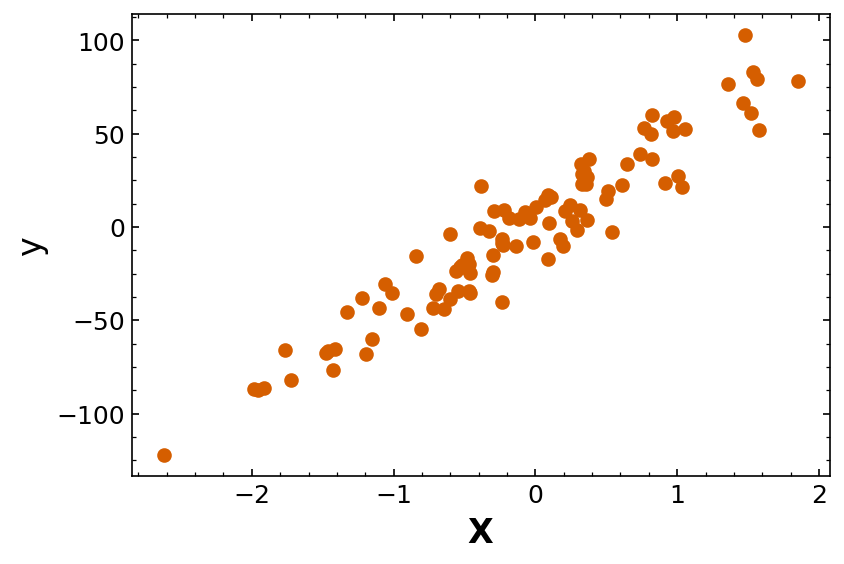

In [26]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 150)
ax.scatter(X,y,color='#D55E00')
ax.set_xlabel(r'$\mathbf{X}$',fontsize = 16)
ax.set_ylabel('y',fontsize = 16)
ax.tick_params(direction='in',top=True,right=True,labelsize = 12, which='both')
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(12.5))

Clearly, this follows a linear trend, with some variation about a linear line. We should be able to fit this using a support vector machine, with a linear kernel.  

Just like last week, we need to separate our data into training and test data:

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

The syntax for SVR is similar to the syntax we have seen for other ML algorithms. 

Note: sklearn has a couple different implementations of SVR for different cases. For a linear regression task, it is best to use ```LinearSVR```, rather than ```SVR``` with ```kernel = 'linear'```. This is due to the specific implementation of these functions: ```LinearSVR``` **only** implements a linear kernel, but for linear regression tasks is much more efficient than using ```SVR```. Beyond the additional ```kernel``` parameter for ```SVR```, the syntax is otherwise the same. We will see more about kernels in Section 3. 

In [32]:
from sklearn.svm import LinearSVR

C = 1.0
epsilon = 10

toy_svr = LinearSVR(epsilon = epsilon, C = C)

toy_svr.fit(X_train, y_train)

C:\Users\lizzi\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(epsilon=10)

Note: you may see a `FutureWarning` regarding the value of the `dual` parameter. This is just to do with the specific algorithm used to solve the SVM problem, and is not concerning.

To evaluate the performance of support vector regression, we need a new metric. A common choice to evaluate a regression model is the **root-mean squared error (RMSE)**:

\begin{equation*}
\text{RMSE} = \sqrt{\frac{1}{N}\sum_{i = 1}^N (y_i - \hat{y}_i)^2},
\end{equation*}
where symbols are defined as

* $y_i$: the true value of $y$ for input $\mathbf{X}_i$
<br>

* $\hat{y}_i$: the SVR prediction for input $\mathbf{X}_i$
<br>

* N: the total number of test samples.

We can make a prediction on our test data, and then calculate the RMSE to see how good the model is. A smaller value is better.




In [33]:
y_pred = toy_svr.predict(X_test)

rmse = (((y_test - y_pred)**2).sum()/len(y_test))**0.5

print(rmse)


18.906959860573316


Much like for classification accuracy, `sklearn` implements the root-mean squared error in an easy function called ```mean_squared_error```. To calculate the root-mean squared error, we pass the argument ```squared = False```.

In [46]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred, squared = False)

18.906959860573313

Again, we want to measure the performance using the cross validation score. An important detail of ```cross_val_score``` in sklearn is that it implements a fixed set of scorers, or used the default scorer of the algorithm as implemented in sklearn. For SVR, this is a metric known as the **coefficient of determination** (which you will see next week), but for consistency we will continue to use the root-mean squared error. This requires manual definition of an RMSE scorer, which we then pass to ```cross_val_score```.

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

rmse_scorer = make_scorer(mean_squared_error, squared = False)

cross_val_score(toy_svr, X_train, y_train, scoring=rmse_scorer)

C:\Users\lizzi\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\lizzi\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\lizzi\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\lizzi\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\lizzi\anaconda3\lib\site-packages\sklearn\svm\_clas

array([25.06410806, 17.03204084, 21.68661553, 19.3192937 , 17.77264147])

Finally, it is useful to visualise the prediction of the algorithm, alongisde the $\varepsilon$ band within which we don't care about errors made on prediction. Here, the solid line is the prediction of the SVR model, and the two dashed lines indicate the $\varepsilon$ region in which the model doesn't care about the difference between the prediction and the true data.

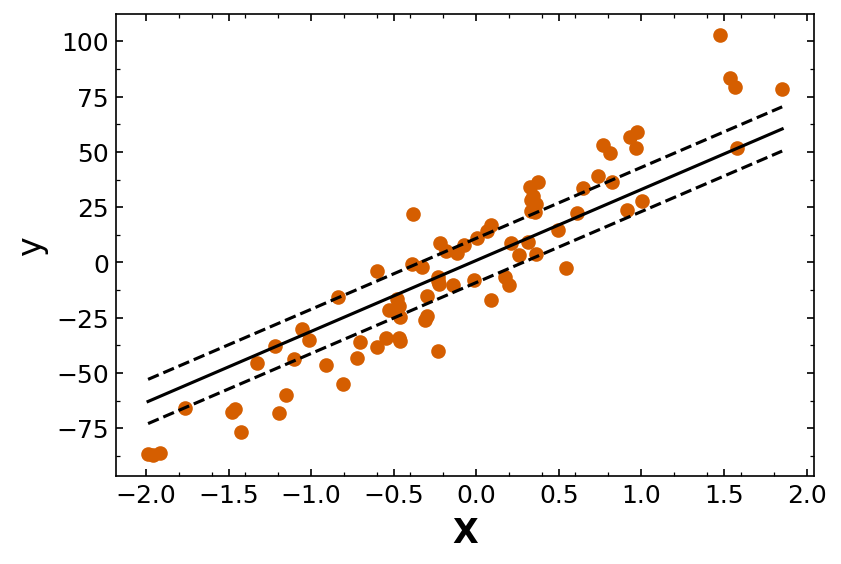

In [48]:
import numpy as np

X_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1,1)

fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 150)
ax.scatter(X_train, y_train,color='#D55E00')
ax.plot(X_range, toy_svr.predict(X_range), color='black')
ax.plot(X_range, toy_svr.predict(X_range) + epsilon, color='black', ls = '--')
ax.plot(X_range, toy_svr.predict(X_range) - epsilon, color='black', ls ='--')

ax.set_xlabel(r'$\mathbf{X}$',fontsize = 16)
ax.set_ylabel('y',fontsize = 16)
ax.tick_params(direction='in',top=True,right=True,labelsize = 12, which='both')
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(12.5))

<div style="background-color:#C2F5DD">


### Example

Now you have the steps to build, train and test an SVR model, try varying the hyperparameters and try to find the best results you can. Hyperparameters to try varying include:
    
* the regularisation parameter `C`
    <br>
    
* `epsilon`, the scale within which prediction errors are not penalised

There are others, take a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinerSVR.html) to see what else you can vary. Make sure to record whatever you do vary!
    
* Make sure to use cross validation, with the `rmse_scorer` we defined earlier. 
<br>

* Record your test data performance and mean cross validation score in a Pandas DataFrame, along with the model hyperparameters you used for each model. 
    <br>
    
* Plot the prediction of your best performing result.

In [49]:
# Define your hyperparameters

C = 
epsilon = 


SyntaxError: invalid syntax (3059853955.py, line 3)

In [50]:
# Define and fit an SVR model to your toy data

model = 


SyntaxError: invalid syntax (4041515956.py, line 3)

In [51]:
# Evaluate your data; calculate test set performance

pred = 

test_rmse = 

SyntaxError: invalid syntax (902499554.py, line 3)

In [52]:
# Plot your best performing model



## Summary

In this section, you have worked with a toy linear model and SVR:

* introduction to syntax of `LinearSVR`
* the root-mean squared error metric

The following section will discuss how we can tackle non-linear problems using kernels.

<hr style="border:2px solid gray">

<a name="section-3"></a>

# Section Three: Non-linear Support Vector Machines [^](#outline)

So far, we have seen for linear problems that support vector machines aim to find a hyperplane that describes the data, with different applications for classification and regression. For a hyperplane defined by a function $f(\mathbf{X})$, prediction is defined as follows:

* classification:  $\hat{y}_i = \text{sign}(f(\mathbf{X_i}))$
* regression: $\hat{y}_i = f(\mathbf{X}_i)$

However, we have up to this point restricted our functions $f(\mathbf{X})$ to purely linear functions, taking $f(\mathbf{X}) = \mathbf{w}^\intercal\mathbf{X} - b$. This is clearly not sufficient for a general problem that can be non-linear; for example, a classification with classes that are not linearly separable, or a regression problem that is not well modelled by a linear model. Instead, to accurately separate two classes, or solve the regression problem, we may need a more generic **hypersurface**, rather than a linear hyperplane.

To be able to apply this algorithm to non-linear data, we need to introduce non-linearities. We can do this by applying a **transformation** to $\mathbf{X}$ to transform to a different feature space in which the data is linear/linearly separable. We can represent this transformation mathematically:

\begin{equation*}
\phi(\mathbf{X}_i) : \mathcal{X} \to \mathcal{F}
\end{equation*}

* $\phi(\mathbf{X}_i$) is the transformation applied to the training input $\mathbf{X}_i$
<br>

* $\mathcal{X}$ denotes the space of the original training inputs $\mathbf{X}_i$; for $p$ input features, this is equivalent to $\mathbb{R}^p$
<br>

* $\mathcal{F}$ denotes the new feature space after the transformation

We will first show how this can allow us to separate classes that are not linearly separable in the original feature space $\mathcal{X}$, then we will discuss some issues with this approach.

## Adding additional features

It is possible to introduce non-linearities to linear models by adding additional features to your inputs $\mathbf{X}$. This can be done for both classification and regression. For example, consider the classification problem below; the two classes are not linearly separable, but intuitively you can imagine a circular curve separating the two classes. 

<div>
<img src=Week6_plots/nonlinear_example_final.png align='center' width=600>
</div>
    
*Example classification problem where the two classes are not linearly separable.*

In this example, we cannot draw a single straight line that separates the two classes. This means that this data is not linearly separable. 

To overcome this, we can add additional features that are constructed from the existing features. In this case we could define a new feature that is the sum of the square of Feature 1 and the square of Feature 2, in analogy with a radius. Class 1 will therefore have higher values of this new feature than Class 2. This can be seen in the figure below. The two classes are linearly separable in Feature 1 and Feature 3.

<div>
<img src=Week6_plots/polynomial_feature_example_final.png align='center' width=600>
</div>

*Now we have added a new feature to the previous dataset, the two classes are now linearly separable.*


In general, for data without a linear hypersurface in $n - 1$ dimensions, we can find a number of dimensions $m$ in which a linear hypersurface of dimensions $m - 1$ can be constructed that well-models the data, for classification or regression.

However, this is not an ideal solution, because:

* SVM learning relies on computing a large number of **inner products**
<br>

* By adding more features to the dataset, the number of computations required increases greatly
<br>

* For large datasets, this becomes computationally infeasible
<Br>

* You have to come up with the new features yourself; in some cases, this is straightforward, but in general it is not easy



In general, it is not feasible to just add more features due to the increased computational complexity. How can we get around this?

## Kernel tricks

We know that our optimisation problem depends only on inputs through inner products. When we transform into the higher dimensional feature space, these inner products are now in the higher dimensional space rather than the original space. We still only care about the result of the inner product; if we can somehow find the result of the inner product in the higher dimensional space from the inner product in the original space, we can save a lot of time. 
    
If we can find some function $k(\mathbf{X}_i,\mathbf{X}_j) = \phi(\mathbf{X}_i)^\intercal\cdot\phi(\mathbf{X}_j)$, we can just compute the value of this function. This approach is referred to as a **kernel trick**. The function $k(\mathbf{X}_i,\mathbf{X}_j)$ is referred to as a **kernel function**, or just a **kernel**.

In fact, we find that for a lot of common transformations (e.g. adding polynomial features), we can define functions $k(\mathbf{X}_i, \mathbf{X}_j)$ that are **only** dependent on calculations in the original space. A few common kernel functions include:

* Polynomial: $k(\mathbf{X}_i,\mathbf{X}_j) = (\gamma\mathbf{X}_i^\intercal \cdot \mathbf{X}_j + r)^d$, where $d$ is the order of the polynomial, $\gamma$ is a scale parameter and $r$ is a bias parameter. $d$ = 1 corresponds to the linear case we have seen already.
<br>
    
* Gaussian radial basis function: $k(\mathbf{X}_i,\mathbf{X}_j) = \exp\left(-\gamma||\mathbf{X}_i - \mathbf{X}_j||^2\right)$, where $\gamma$ is a scale parameter and $\gamma$ > 0
<br>
    
* Sigmoid function: $k(\mathbf{X}_i,\mathbf{X}_j) = \tanh(\gamma\mathbf{X}_i^\intercal\cdot\mathbf{X}_j + r)$, where $\gamma$ and $r$ are scale and bias parameters respectively

These are the fundamental basis of doing any non-linear classification or regression using SVM. You will have seen ```kernel``` as an argument for the ```SVC``` you saw last week. 

The figure below shows the results of applying a polynomial kernel (order 2) SVM to the circular data we saw above. Now that we are using a non-linear kernel, we can easily find a curve which we can use to discriminate between the two classes. The same analysis can be applied to higher dimensional problems.


<div>
<img src=Week6_plots/nonlinear_svm_decision_boundary.png align='center' width=550>
</div>
    
*Prediction of a non-linear SVC model with a polynomial kernel, order 2. The shaded regions indicate the class that would be predicted in that region.*

The same principle is equally applicable to regression. For example, we can see how using a linear kernel vs a polynomial kernel performs on some quadratic data with Gaussian noise. This can be seen in the figure below. The dotted lines indicate the $\varepsilon$ regions where we don't care about prediction mistakes. The linear kernel clearly is not correct, but modelling using a polynomial kernel with degree 2 works well.

<img src=Week6_plots/linear_vs_polynomial_kernel_SVR.png align="center" height=500>

*SVR using linear and polynomial kernels, for quadratic data with Gaussian noise. Clearly the linear model does not fit, but the polynomial kernel performs well.*

## An aside on preprocessing

In the case of applying a linear kernel to non-linear data, we have discussed adding new features to our data to try to simplify the problem or make it easier for our algorithm to solve the problem. However, this is not the only type of **preprocessing** we can do to help in ML; some examples include:

* Rescaling: transforming your data into a specific range, e.g. such that all of your input features are between 0 and 1 or between -1 and 1. If the scale between different features is significantly different then one feature can influence the training more than others.
<br>

* Encoding categorical features: some datasets will have non-numeric data, e.g. whether a house has a garden or not, which must be transformed into numerical data for the purposes of training a machine learning algorithm. 
<br>

* Discretization: turning a continuous variable into a series of categories, e.g. applying binning to data. 

In scikit-learn, `sklearn.preprocessing` contains many useful tools for preprocessing data, such as `StandardScaler`, which scales data to a standard normal distribution i.e. a Gaussian with $\mu = 0$ and $\sigma = 1$.

You can also arrange preprocessing operations into a so-called **pipeline** with machine learning models, using the function `make_pipeline` from `sklearn.pipeline`. An example of composing a pipeline can be seen in the code cell below.

In [53]:
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

scaler = preprocessing.StandardScaler()
svr = SVR(kernel = 'linear')

pipeline = make_pipeline(scaler, svr)

print(pipeline)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(kernel='linear'))])


You can read more about preprocessing in the scikit-learn [User Guide](https://scikit-learn.org/stable/modules/preprocessing.html). In general it is good to make sure all of your input features are a similar scale to make sure your model properly learns from all features.

## Summary

In this section, we have covered how we can tackle non-linear problems using SVMs, including:

* adding additional input features
* transforming inputs to a higher dimensional input space
* kernel tricks
* preprocessing data using scikit-learn

The following section will introduce the dataset we will be using for the remainder of this week.

<hr style="border:2px solid gray">

<a id='section-4'></a>
# Section Four: The California Housing dataset [^](#outline)

Now we have experimented with SVR on toy data, we will now introduce the dataset you will work with for the remainder of this week. 

We will work with another dataset that is built into sklearn, the California housing dataset. This datset is derived from the 1990 U.S. census, which comprises house prices grouped by block group (the smallest geographical unit used by the US Census Bureau, typically 600-3000 people) and 8 features for each sample. 

Further details can be found in the `sklearn` [User Guide](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset). You are encouraged to take a look at this, as it explains exactly what each of the input features are. Much like the Iris dataset you saw last week, it is easy to import:

In [54]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()

The target for this dataset is the median house value in a given block group. As always, it is important to visualise our dataset before we start with any ML. You can see the ```scatter_matrix``` below. As a quick refresher on ```scatter_matrix```, the plots on the line from the top left to the bottom right are the histograms of the relevant quantities, whereas the rest of the plots are scatter plots of each quantity against the other. 

<div>
<img src=Week6_plots/california_housing_scatter_matrix_final.png align="center" width=800>
</div>

This is clearly more complex than the Iris dataset, due to the increased number of input features. The scatter point color denotes the value of the target, the median house value (in units of $100,000). 

## Summary

In this section, you have had a brief introduction to the California housing dataset. 

You will use this dataset and a toy non-linear dataset to practise using SVR for the remainder of this week. 

The following section covers the exercises for you to work on yourselves this week.

<hr style="border:2px solid gray">

<a name="section-5"></a>

# Section Five: Exercises [^](#outline)

## Non-linear toy model

While you have seen a toy model with linear data before, here we will define a non-linear dataset for you to practise on, using the ```SVR``` class in sklearn. We will use the data stored in the "poly_data.h5" file. 

<div style="background-color:#C2F5DD">

### Exercise 1

First, we are going to load and visualise the data. Follow these steps:
    
* Using `pd.read_hdf`, load in the data in "poly_data.h5"
    <br>  
    
* Display the DataFrame so you can see the columns
<br>
    
* Plot the data

In [55]:
# Load the data
import pandas as pd
import matplotlib.pyplot as plt
poly=pd.read_hdf("poly_data.h5")
X1,y1=poly.input,poly.target

In [56]:
# Display the DataFrame
poly

,input,target
0,-0.810963,-4.785527
1,-1.787533,18.718517
2,-0.564339,4.362076
3,1.945595,28.912134
4,2.532098,65.201726
...,...,...
95,1.861651,20.709813
96,1.448489,0.346217
97,-0.717398,10.275039
98,0.127342,-0.876361


[Text(0.5, 0, 'X'), Text(0, 0.5, 'y')]

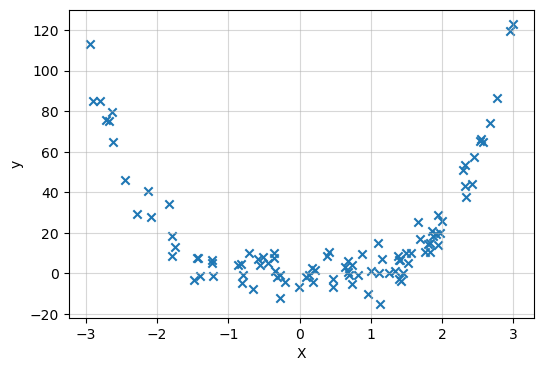

In [57]:
# Plot the data
fig,ax=plt.subplots(1,1,figsize=(6,4))
ax.scatter(X1,y1,marker='x')
ax.grid(alpha=0.5)
ax.set(xlabel='X', ylabel='y')


<div style="background-color:#C2F5DD">

### Exercise 2

Train a support vector machine to model these data. Start by using ```kernel = 'poly'```, and try varying different hyperparameters, including:
    
* `C`: the regularisation coefficient
* `epsilon`: the scale within which prediction errors are not penalised
* `degree`: the degree of the polynomial kernel
* `coef0`: a bias term in the kernel, see the [User Guide](https://scikit-learn.org/stable/modules/svm.html#kernel-functions) for more information.
    
Make sure to follow these steps:

* Split data into test and training sets
* Define your hyperparameters
* Define your model
* Calculate your cross validation score
* Fit the model to your training data
* Predict on the test data and calculate the RMSE between the test data and prediction
* Record your hyperparameters, mean cross validation score, and test data RMSE in a pandas DataFrame for each combination of hyperparameter values you try.
* Plot your final prediction line like we have done before, along with the training/test data points.



In [58]:
# Split into test and training
from sklearn.model_selection import train_test_split
X1train,X1test,\
y1train,y1test = train_test_split(X1,y1,random_state=0)


In [59]:
# Define your hyperparameters
kernel='poly'
epsilon=1
C=1
degree=2
coef0=0
#doing it like this feels stupid

In [134]:
from sklearn.svm import SVR
svr1=SVR(kernel='poly',degree=2,coef0=1,C=1,epsilon=0.0005)


In [135]:
# Fit model to training data
X1train=np.array(X1train).reshape(-1,1)
svr1.fit(X1train,y1train)


SVR(C=1, coef0=1, degree=2, epsilon=0.0005, kernel='poly')

In [136]:
# Predict on test data & calculate RMSE
X1test=np.array(X1test).reshape(-1,1)
ypred1=svr1.predict(X1test)
rmse_scorer1 = make_scorer(mean_squared_error, squared = False)
cross_val1=cross_val_score(svr1,X1train,y1train,scoring=rmse_scorer1)
mean_sqr1=mean_squared_error(y1test,ypred1,squared=False)
print("The cross value scores are {}, and the mean squared error is {}".format(cross_val1,mean_sqr1))


The cross value scores are [14.94537589 11.62755573 16.90851699 10.10110607 20.43317447], and the mean squared error is 8.393195472035059


[Text(0.5, 0, 'X'), Text(0, 0.5, 'y')]

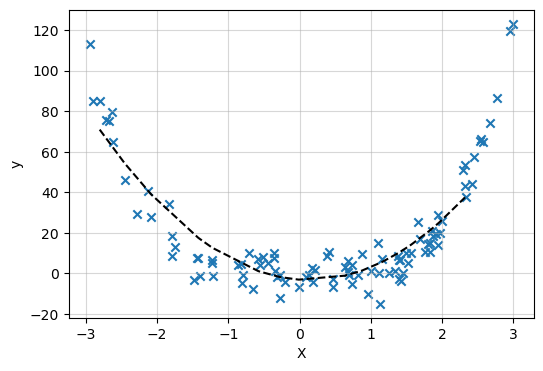

In [137]:
X1plot=X1test.reshape(25)
index=np.argsort(X1plot)
fig,ax=plt.subplots(1,1,figsize=(6,4))
ax.scatter(X1,y1,marker='x')
ax.plot(X1plot[index],ypred1[index],linestyle='--',color='black')
ax.grid(alpha=0.5)
ax.set(xlabel='X', ylabel='y')


its kinda mid 

<div style="background-color:#C2F5DD">

### Exercise 3

Train another SVM, this time using ```kernel = 'rbf'``` or ```kernel = 'sigmoid'```. Use the [User Guide](https://scikit-learn.org/stable/modules/svm.html#kernel-functions) to reach up on the corresponding parameters of the kernel. How do your best results compare with your polynomial kernel results?

Make sure to follow these steps:

* Split data into test and training sets
* Define your hyperparameters
* Define your model
* Calculate your cross validation score
* Fit the model to your training data
* Predict on the test data and calculate the RMSE between the test data and prediction
* Record your hyperparameters, mean cross validation score, and test data RMSE in a pandas DataFrame for each combination of hyperparameter values you try.




In [ ]:
# Define your hyperparameters
# **no**


In [91]:
# Define your model
svr_rbf=SVR(kernel='rbf',gamma=1,epsilon=1,C=1)
svr_sig=SVR(kernel='sigmoid',gamma=1,coef0=0,epsilon=1,C=1)


In [92]:
# Fit model to training data
svr_rbf.fit(X1train,y1train)
svr_sig.fit(X1train,y1train)


SVR(C=1, coef0=0, epsilon=1, gamma=1, kernel='sigmoid')

In [94]:
# Predict on test data & calculate RMSE
ypred_rbf=svr_rbf.predict(X1test)
ypred_sig=svr_sig.predict(X1test)
cross_val_rbf=cross_val_score(svr_rbf,X1train,y1train,scoring=rmse_scorer1)
cross_val_sig=cross_val_score(svr_sig,X1train,y1train,scoring=rmse_scorer1)
mean_sqr_rbf=mean_squared_error(y1test,ypred_rbf,squared=False)
mean_sqr_sig=mean_squared_error(y1test,ypred_sig,squared=False)
print('The mean square errors are {} for poly, {} for rbf and {} for sigmoid'.format(mean_sqr1,mean_sqr_rbf,mean_sqr_sig))

The mean square errors are 8.712295269330681 for poly, 16.763290233093745 for rbf and 22.299480057543967 for sigmoid


<div style="background-color:#C2F5DD">

Which of your models performed the best? Write a couple sentences describing why you chose the hyperparameters you did.

Your answer here



## California housing dataset

Before we begin using SVR with the California housing dataset, we want to get more familiar with it. 

<div style="background-color:#C2F5DD">

### Exercise 4

Visualise the California housing dataset. You could do this using ```scatter_matrix```, for example, or any method of your choice.

Write short answers to the following questions:

* Do any features appear to correlate well with the target?
* Any first ideas as to what kind of model might work with this data?
* Is the target approximately linear in any of the features?

In [142]:
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

array([[<Axes: xlabel='MedInc', ylabel='MedInc'>,
        <Axes: xlabel='HouseAge', ylabel='MedInc'>,
        <Axes: xlabel='AveRooms', ylabel='MedInc'>,
        <Axes: xlabel='AveBedrms', ylabel='MedInc'>,
        <Axes: xlabel='Population', ylabel='MedInc'>,
        <Axes: xlabel='AveOccup', ylabel='MedInc'>,
        <Axes: xlabel='Latitude', ylabel='MedInc'>,
        <Axes: xlabel='Longitude', ylabel='MedInc'>],
       [<Axes: xlabel='MedInc', ylabel='HouseAge'>,
        <Axes: xlabel='HouseAge', ylabel='HouseAge'>,
        <Axes: xlabel='AveRooms', ylabel='HouseAge'>,
        <Axes: xlabel='AveBedrms', ylabel='HouseAge'>,
        <Axes: xlabel='Population', ylabel='HouseAge'>,
        <Axes: xlabel='AveOccup', ylabel='HouseAge'>,
        <Axes: xlabel='Latitude', ylabel='HouseAge'>,
        <Axes: xlabel='Longitude', ylabel='HouseAge'>],
       [<Axes: xlabel='MedInc', ylabel='AveRooms'>,
        <Axes: xlabel='HouseAge', ylabel='AveRooms'>,
        <Axes: xlabel='AveRooms', ylabel

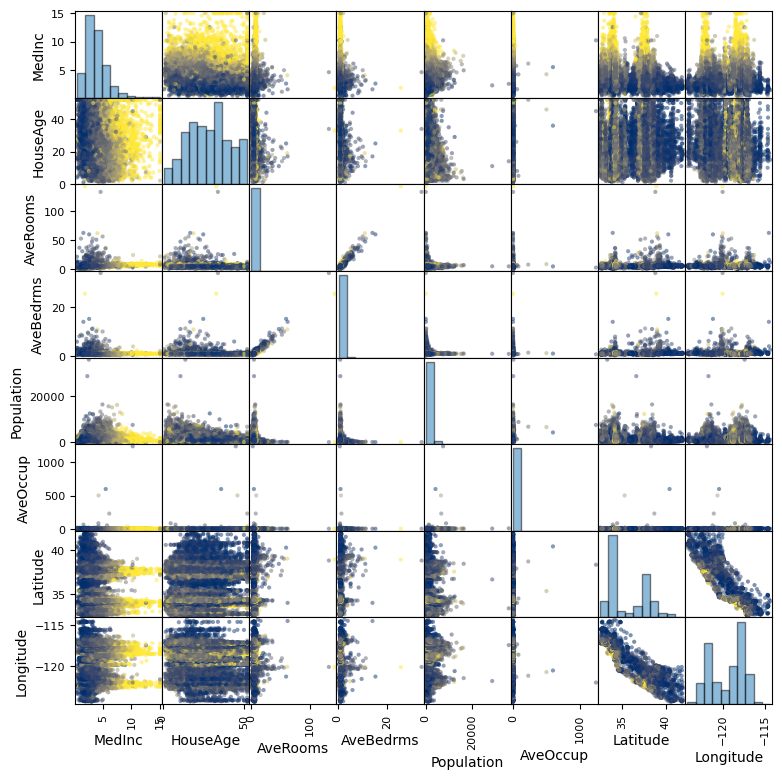

In [143]:
# Visualise the data
import matplotlib.cm as cm
cali_df=pd.DataFrame(california_housing.data,columns=california_housing.feature_names)
pd.plotting.scatter_matrix(cali_df, c = california_housing.target,hist_kwds={'alpha':0.5,'edgecolor':'black'},figsize=(9,9), cmap = cm.cividis)


Your answers to questions here

## SVR with the California housing dataset

<div style="background-color:#C2F5DD">

### Exercise 5

Now you have practised using SVR for a non-linear dataset with 1 input feature, you will apply it to the California housing dataset.

* Prepare the California housing dataset - split into test & training sets
* Define your hyperparameters
* Prepare your model
* Calculate your cross-validation score
* Train your model
* Evaluate the model performance on the test data

Try varying the hyperparameters to get the best performance you can. Hyperparameters to vary include:

* The regularisation parameter ```C```
* The deviation below which errors are ignored ```epsilon``` ($\varepsilon$ in the theory discussion earlier)

Note each kernel has specific parameters that you can also vary. See the [User Guide](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) for more details. 
    
**Use the `rbf` kernel, as training with polynomial kernels can take a long time. Also note that because we have a lot of data points in the Califorina housing dataset, training SVMs in general can take a long time. The time taken to train SVMs for large amounts of data is one of the reasons they aren't used as commonly as e.g. neural networks (which you will see in Week 9): they are not as scalable.**

Make sure you record all hyperparameters you use for a given result in a pandas DataFrame.

In [151]:
# Define train / test 
X=california_housing.data
y=california_housing.target
Xtrain,Xtest,\
ytrain,ytest=train_test_split(X,y,random_state=0)

In [152]:
# Define hyperparameters
#no

In [153]:
# Define model
svm_cali=SVR(kernel='rbf',gamma=1,epsilon=1,C=1)

In [154]:
# Fit model
svm_cali.fit(Xtrain,ytrain)

SVR(C=1, epsilon=1, gamma=1)

In [155]:
# Evaluate on test data
ypred_cali=svm_cali.predict(Xtest)

In [159]:
rms=mean_squared_error(ytest,ypred_cali,squared=False)
rms

1.1708169549702152

AttributeError: 'SVR' object has no attribute 'decision_function'

<div style="background-color:#C2F5DD">

Explain your final choice of kernel and other hyperparameters. 



Your answer here